In [147]:
# https://archive.ics.uci.edu/dataset/267/banknote+authentication
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

## Preprocessing

In [148]:
df = fetch_ucirepo(id=267) 
  
X = df.data.features 
y = df.data.targets

In [149]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [150]:
X.describe()

,variance,skewness,curtosis,entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


In [151]:
X.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
dtype: int64

In [152]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
dtypes: float64(4)
memory usage: 43.0 KB


In [153]:
y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [154]:
y.isnull().sum()

class    0
dtype: int64

## Training our model

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## Evaluating our model

In [156]:
print('Classification Report')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix')
print(confusion_matrix(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       148
           1       1.00      0.96      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275


Confusion Matrix
[[148   0]
 [  5 122]]


## Visualizing our model

In [157]:
type(y_pred)

numpy.ndarray

In [158]:
df2 = X_test
df2['Actual'] = y_test
df2['Model Prediction'] = y_pred
df2.head()

,variance,skewness,curtosis,entropy,Actual,Model Prediction
430,1.569100,6.3465,-0.1828,-2.4099,0,0
588,-0.278020,8.1881,-3.1338,-2.5276,0,0
296,0.051979,7.0521,-2.0541,-3.1508,0,0
184,-1.755900,11.9459,3.0946,-4.8978,0,0
244,2.428700,9.3821,-3.2477,-1.4543,0,0


Text(0.5, 1.0, 'Skewness and Variance')

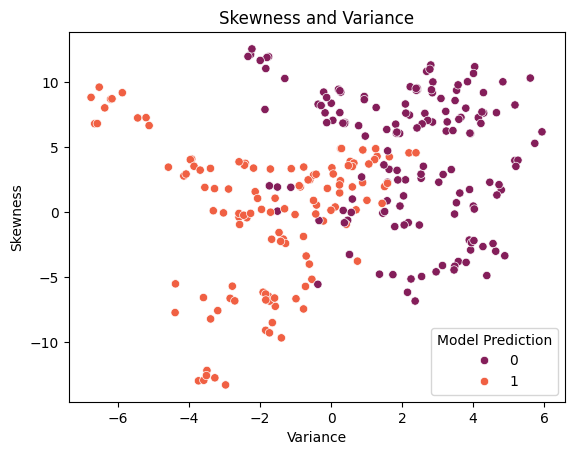

In [159]:
p = sns.scatterplot(data=df2, x='variance', y='skewness', hue='Model Prediction', palette='rocket')
p.set_ylabel('Skewness')
p.set_xlabel('Variance')
p.set_title('Skewness and Variance')

Text(0.5, 1.0, 'Entropy and Curtosis')

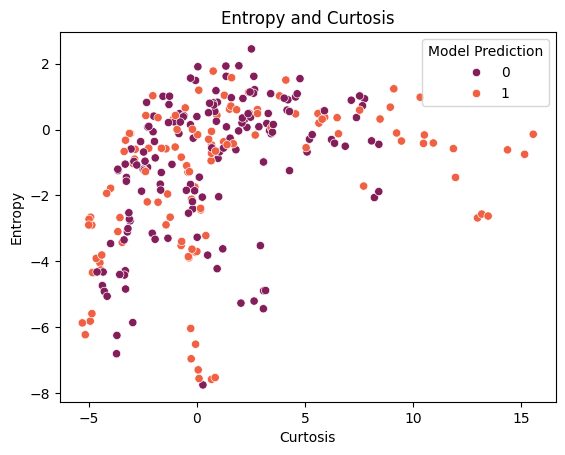

In [160]:
p = sns.scatterplot(data=df2, x='curtosis', y='entropy', hue='Model Prediction', palette='rocket')
p.set_ylabel('Entropy')
p.set_xlabel('Curtosis')
p.set_title('Entropy and Curtosis')

## Identifying 5 samples the model got wrong

In [164]:
df2[df2['Actual'] != df2['Model Prediction']]

,variance,skewness,curtosis,entropy,Actual,Model Prediction
770,0.34340,0.12415,-0.28733,0.146540,1,0
1338,1.58100,0.86909,-2.31380,0.824120,1,0
1216,0.60050,0.99945,-2.21260,0.097399,1,0
1075,0.37637,-0.82358,0.78543,0.745240,1,0
1078,-0.37013,-5.55400,4.77490,1.547000,1,0
